# Proyecto: Procesamiento de Datos con Python 2023 
## API del Sistema de Información Económica (SIE) de Banco de México

## Solicitud de prueba a la API, análisis de la estructura de los datos obtenidos y conversión de JSON a Data Frame


### Solicitud de prueba a la API

En esta sección se relizará una petición para probar como funciona la API del proyecto.

Para usar la [SIE-API](https://www.banxico.org.mx/SieAPIRest/service/v1/) de Banco de México es necesario:
* Token, se obtiene [aquí](https://www.banxico.org.mx/SieAPIRest/service/v1/token)
* Endpoint o url, ubicado en la [documentación](https://www.banxico.org.mx/SieAPIRest/service/v1/doc/consultaDatosSeries) correspondiente a datos históricos
* Idenidentificador de serie de tiempo, se consulta en el catálogo de [catálogo de series](https://www.banxico.org.mx/SieAPIRest/service/v1/doc/catalogoSeries)

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Se importan las bibliotecas requests y pandas para realizar llamadas HTTP y manipular datos respectivamente. 
import requests
import pandas as pd

In [4]:
# Token obtenido en el sitio SIE API de Banco de México. 
token = '5d4442d9cd23918613a61626f0dacf97bba0afd996fa0b923c6657b6eeb26297'

# URL para hacer consultas a la API de Banco de México.
endpoint = 'https://www.banxico.org.mx/SieAPIRest/service/v1/series/'

# Definición de un diccionario para almacenar los parametros de la funcion get de la libreria requests. 
params = {
    "token" : token
}

In [5]:
# Definición de las listas que almacenan los identificadores de series a consultar.
# Cómo se menciona el reporte escrito, la API permite consultas en grupos de máximo 20 identificadores.
# Cada identificador de serie corresponde a una columna del data frame final.  
id_cuentas_validas = ['SF335591-SF335610/datos', 'SF335611-SF335629/datos', 'SF339757/datos', 'SF350480/datos']

In [6]:
# Se realiza una solicitud GET para obtener del API una respuesta con los parametros definidos. 
r = requests.get(endpoint+id_cuentas_validas[0], params = params)

In [7]:
# Se verifica el código que indica el estado de la respuesta a la solicitud HTTP realizada a la API. 
r.status_code

200

### Análisis de la estructura de los datos obtenidos

Una vez que se verificó que la solicud se realizó correctamente, se analiza la estructura de los datos obtenidos. 

El análisis incluye: 
* Verificar el tipo de objeto de la respuesta (lista, diccionario, tupla, etc.)
* Explorar la estructura de los datos para definir la manera más adecuada de extraerlos. 

En este caso se encontró que los datos se estructuraban en varias listas anidadas con diccionarios.

In [8]:
# Se obtiene la respuesta codificada con el método json()
r.json()

# Se observa que la respuesta obtenida se trata de un objeto tipo diccionario. 
type(r.json())

dict

In [9]:
# Se obtienen las claves del diccionario, en este caso sólo existe la clave 'bmx'.  
r.json().keys()

dict_keys(['bmx'])

In [10]:
# Se observa el tipo de objeto que contiene la clave 'bmx', es un diccionario.  
type(r.json()['bmx'])

dict

In [11]:
# Se obtienene las claves del primer diccionario anidado, sólo existe la clave 'series'  
r.json()['bmx'].keys()

dict_keys(['series'])

In [12]:
# Se observa el tipo de objeto que contiene la clave 'series', es una lista.
type(r.json()['bmx']['series'])

list

In [13]:
# Se analiza el primer elemento de la lista que contiene la clave 'series'.
# Se determina que es una lista de diccionarios.   
# Se usó indexación con el código siguiente.

# json()['bmx']['series'][0]

# Se comentó el código de esta celda porque devuelve un resultado muy extenso que 
# dificulta la lectura del Notebook. En su lugar se muestra una imagen con una 
# muestra del resultado. 

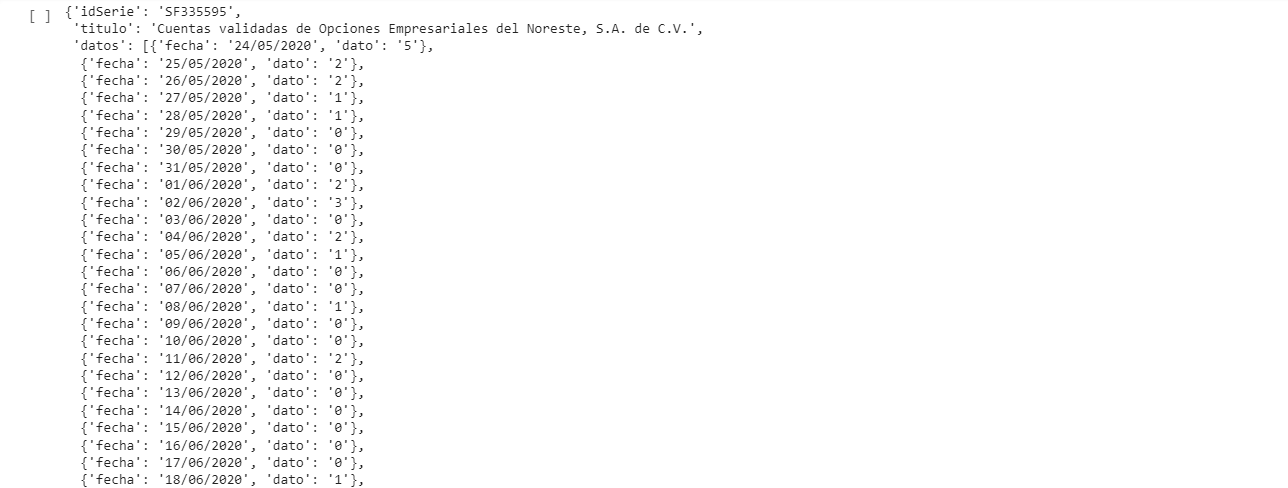

In [14]:
# Por comodidad, se asigna la lista de diccionarios a la variable prueba_lista
prueba_lista = r.json()['bmx']['series']

In [15]:
# Se analiza la lista de diccionarios, en este caso se trata de una lista de 20 
# elementos que corresponden a cada una de las series solicitadas en la prueba al API. 
len(prueba_lista)

20

In [16]:
# Se accede al primer diccionario de la lista para analizarlo a detalle. 
# Se trata de un diccionario con las claves: 'idSerie', 'titulo' y 'datos'.
print(type(prueba_lista[0]))
print(prueba_lista[0].keys())

<class 'dict'>
dict_keys(['idSerie', 'titulo', 'datos'])


In [17]:
# Se accede a las claves 'idSerie' y 'titulo'. 
# Estas son cadenas que contienen el identificador de la serie y el título de la entidad financiera. 
print(prueba_lista[0]['idSerie'])
print(type(prueba_lista[0]['idSerie']))
print(prueba_lista[0]['titulo'])
print(type(prueba_lista[0]['titulo']))

SF335594
<class 'str'>
Cuentas validadas de Banca Afirme, S.A.
<class 'str'>


In [18]:
# Se accede a la clave 'datos' que es una lista de diccionarios con las fechas y datos deseados.
print(type(prueba_lista[0]['datos']))

# print(prueba_lista[0]['datos'])

# Se comentó el código de arriba de esta celda porque devuelve un resultado muy extenso que 
# dificulta la lectura del Notebook. En su lugar se muestra una imagen con una 
# muestra del resultado. 

<class 'list'>


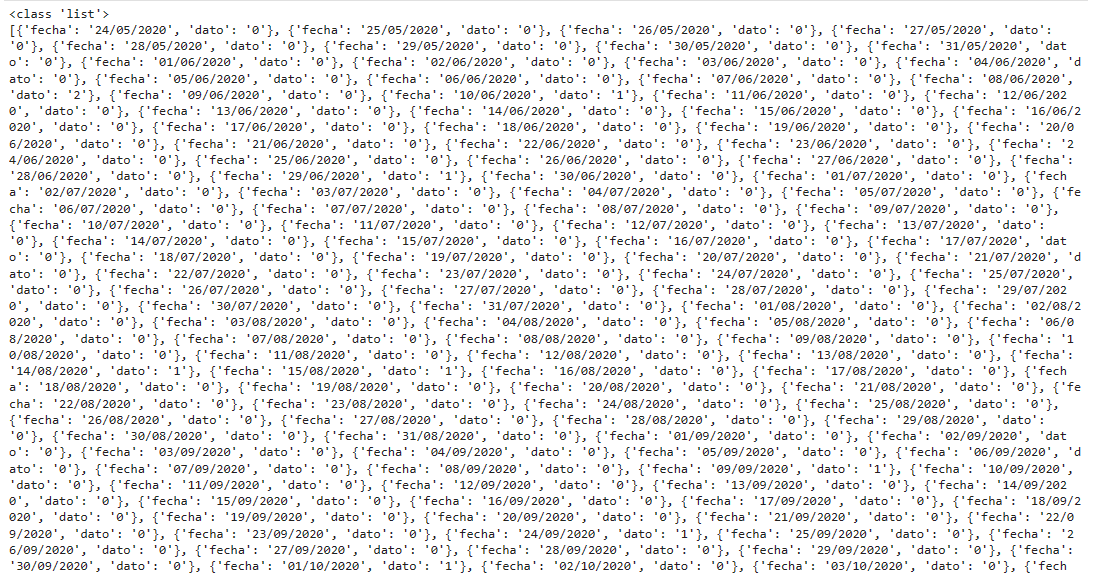

In [19]:
# Se analiza la clave 'datos' y se observa que nuevamente se trata de una lista de diccionarios. 
print(type(prueba_lista[0]['datos'][0]))
prueba_lista[0]['datos'][0]

<class 'dict'>


{'fecha': '24/05/2020', 'dato': '41'}

### Prueba conversión de JSON a Data Frame
Una vez que se identificó la estructura de los datos, se definió la forma de extraerlos y convertirlos en un data frame. Para esto fue necesario: 

* Usar un `for loop` que recorra la lista `prueba_lista`
* Convertir cada elemento de la lista en un data frame con `pd.DataFrame()`
* Usar el valor de la clave `'fecha'` como índice del data frame
* Convertir los valores del indice a un tipo de dato `datetime64`
* Usar el valor de la clave `'titulo'` como nombre de la columna
* Definir la lista `lista_provisional` para guardar cada data frame procesado con el método `append()`

Después de tener la lista de dataframes completa, se unieron cada uno de estos
con el método `pd.contact()` y se indicó el parametro `axis=1` para hacer la concatenación horizontalmente. 

El resultado fue un data frame de 982 filas y 20 columnas, las columnas corresponden al primer grupo de identificadores de series que se usaron para la solicitud HTTP de prueba hacia la API. 

In [20]:
lista_provisional = []
for i in prueba_lista:
    df_interno = pd.DataFrame(i['datos'])
    df_interno = df_interno.set_index('fecha')
    df_interno.index = pd.to_datetime(df_interno.index, format='%d/%m/%Y')
    df_interno.rename(columns={'dato': i['titulo']}, inplace=True)
    lista_provisional.append(df_interno)

df_prueba = pd.concat(lista_provisional, axis=1)
df_prueba

,"Cuentas validadas de Banca Afirme, S.A.","Cuentas validadas de Banco Nacional de México, S.A.","Cuentas validadas de BBVA Bancomer, S.A.",Total de cuentas validadas,"Cuentas validadas de Banco Nacional del Ejército, Fuerza Aérea y Armada","Cuentas validadas de Bansi, S.A.","Cuentas validadas de Banco Actinver, S.A.","Cuentas validadas de Banco Mercantil del Norte, S.A.","Cuentas validadas de ABC Capital, S.A.","Cuentas validadas de Banco Azteca, S.A.","Cuentas validadas de Banco Bancrea, S.A.","Cuentas validadas de Banco del Bajío, S.A.","Cuentas validadas de Banco Base, S.A.","Cuentas validadas de Opciones Empresariales del Noreste, S.A. de C.V.","Cuentas validadas de Banco Ahorro Famsa, S.A.",Cuentas validadas de Banco Regional S.A.,"Cuentas validadas de Banco del Ahorro Nacional y Servicios Financieros, S.N.C.","Cuentas validadas de Bankaool, S.A.","Cuentas validadas de BanCoppel, S.A.","Cuentas validadas de Banco Autofin México, S.A."
fecha,,,,,,,,,,,,,,,,,,,,
2020-05-24,41,"1,352","12,572","20,477",20,0,0,339,0,718,0,21,1,5,12,362,0,0,"2,571",2
2020-05-25,11,502,"5,689","9,422",9,0,0,161,0,294,1,9,0,2,13,141,0,0,942,1
2020-05-26,27,624,"5,652","9,494",6,0,0,135,0,243,0,4,1,2,12,158,1,0,910,2
2020-05-27,16,565,"8,761","11,850",10,0,0,119,0,233,0,9,0,1,11,121,0,0,800,0
2020-05-28,16,603,"10,299","13,902",18,0,0,175,0,297,0,15,0,1,28,140,0,0,"1,003",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26,24,"1,177","7,913","11,476",5,0,0,295,0,375,0,14,0,6,N/E,124,0,0,842,3
2023-01-27,37,965,"8,602","12,159",11,0,1,352,0,449,0,26,0,17,N/E,124,0,0,857,0
2023-01-28,18,835,"6,835","9,989",10,0,0,282,0,391,0,19,0,1,N/E,78,1,0,888,1


## Automatización de solicitudes a la API y transformación de JSON a Data Frame 

### Automatización de solicitudes a la API

Este punto se realizó con un `for loop` para recorrer cada elemento de la lista `id_cuentas_validas` que almacena los identificadores de las series de tiempo en rangos de 20. 

Se usó un bloque `try-except` para manejar posibles errores o excepciones en el código. 

Además, solo si el código del estado de la respuesta es `200`, se ejecuta el bloque siguiente: 
* Se asigna la lista de diccionarios a la variable `lista_datos`
* Se asignan todas las listas del ciclo en turno a la variable `lista_cuentas_validas` con el método `.extend()`

En caso de que el código del estado de la respuesta no sea `200`, se ejecutará un mensaje avisando del error. 

In [21]:
lista_cuentas_validas = []
for id in id_cuentas_validas:
  try:
    r = requests.get(endpoint+id, params = params)
    if r.status_code == 200:
      lista_datos = r.json()['bmx']['series']
      lista_cuentas_validas.extend(lista_datos)
    else: print(f"Ha ocurrido un error: {r.status_code}")       
  except: 
    continue

### Automatización de transformación de JSON a Data Frame

Se usa el mismo código que el de la sección **Prueba conversión de JSON a Data Frame** pero con la lista que se obtuvo en el punto anterior: `lista_cuentas_validas`. 

El resultado final es el data frame `df_cuentas_validas`, igual al que se uso durante el proyecto de 982 filas y 41 columnas.

Finalmente se guarda el data frame obtenido en un archivo `.csv` con el método `to_csv()`

In [22]:
lista_cocat = []
for i in lista_cuentas_validas:
    df_interno = pd.DataFrame(i['datos'])
    df_interno = df_interno.set_index('fecha')
    df_interno.index = pd.to_datetime(df_interno.index, format='%d/%m/%Y')
    df_interno.rename(columns={'dato': i['titulo']}, inplace=True)
    lista_cocat.append(df_interno)

df_cuentas_validas = pd.concat(lista_cocat, axis=1)
df_cuentas_validas

,"Cuentas validadas de Banco del Ahorro Nacional y Servicios Financieros, S.N.C.","Cuentas validadas de Banco Actinver, S.A.","Cuentas validadas de Opciones Empresariales del Noreste, S.A. de C.V.","Cuentas validadas de Banco Azteca, S.A.","Cuentas validadas de Bansi, S.A.","Cuentas validadas de Banco Base, S.A.","Cuentas validadas de Banco Autofin México, S.A.","Cuentas validadas de Banco Ahorro Famsa, S.A.","Cuentas validadas de Banco Mercantil del Norte, S.A.","Cuentas validadas de Bankaool, S.A.",...,"Cuentas validadas de Banco Multiva, S.A.","Cuentas validadas de Intercam Banco, S.A.","Cuentas validadas de Banco Invex, S.A.","Cuentas validadas de HSBC México, S.A.","Cuentas validadas de Banco Compartamos, S.A.","Cuentas validadas de Sistema de Transferencias y Pagos STP, S.A. de C.V.","Cuentas validadas de Banco Sabadell, S.A.","Cuentas validadas de Banco Inmobiliario Mexicano, S.A.","Cuentas validadas de Accendo Banco, S.A.","Cuentas validadas de Operadora de Pagos Móviles de México, S.A de C.V."
fecha,,,,,,,,,,,,,,,,,,,,,
2020-05-24,0,0,5,718,0,1,2,12,339,0,...,0,6,0,863,13,8,0,0,N/E,0
2020-05-25,0,0,2,294,0,0,1,13,161,0,...,0,1,0,"1,047",2,5,0,0,N/E,0
2020-05-26,1,0,2,243,0,1,2,12,135,0,...,0,1,0,"1,119",2,6,1,0,N/E,0
2020-05-27,0,0,1,233,0,0,0,11,119,0,...,0,2,0,598,7,3,1,0,N/E,0
2020-05-28,0,0,1,297,0,0,1,28,175,0,...,0,1,0,579,5,8,2,0,N/E,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26,0,0,6,375,0,0,3,N/E,295,0,...,0,4,0,295,4,9,-1,0,N/E,0
2023-01-27,0,1,17,449,0,0,0,N/E,352,0,...,0,3,0,362,7,15,0,0,N/E,0
2023-01-28,1,0,1,391,0,0,1,N/E,282,0,...,-1,1,0,242,3,12,0,0,N/E,0


In [23]:
# Se guardó el data frame obtenido en un archivo .csv para un uso posterior. 
df_cuentas_validas.to_csv('Datasets/api_cuentas_validas.csv')